# Student Expectations of Job market and Trends

In [116]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import seaborn as sns
import import_ipynb 


# import the dataset
df = pd.read_csv('survey-dataset.csv')

In [117]:
categorical_cols = ["Age", "Gender", "Status", "Qualification", "Internship", "Job-confidence", 
                       "Job-security", "Skill-set-scale", "Updated-LinkedIn", "Certification", "Job-platforms-freq", 
                       "Market-awareness", "Automation-impact", "Work-mode", "Curriculum-use", "Job-search-time-weekly",
                       "Motivation", "Switch-domain", "Relocate", 'Income(₹)']

numerical_cols = ['Exp-month-salary(INR )', 'Score']

## Pre-processing

### Cleaning Numerical Cols

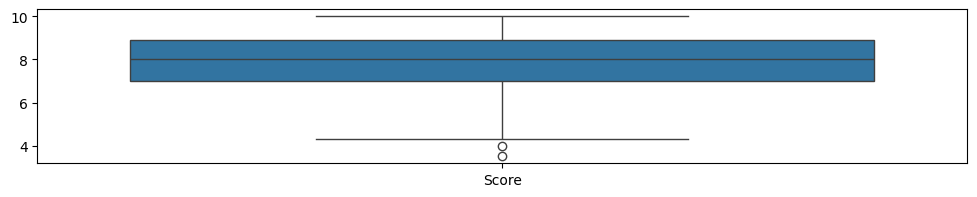

In [118]:
# Cleaning Score
from clean_utils import format_to_cgpa
df['Score'] = format_to_cgpa(df['Score'])
#print(df['Score'].unique())

# Boxplot
sns.boxplot(data=df[['Score']]).figure.set_size_inches(12, 2)
plt.show()

Median ->  40000.0 	 Mean --> 92722.56218905473
[3600000 2000000  720000  700000  550000  500000  400000  350000  300000
  250000  200000  180000  160000  150000  140000  125000  120000  100000
   85000   80000   75000   70000   65000   60000   52000   50000   45000
   40000   35000   32000   30000   29000   25000   21200   21000   20000
   15000   14000   12000   10000    6000    5000      35]


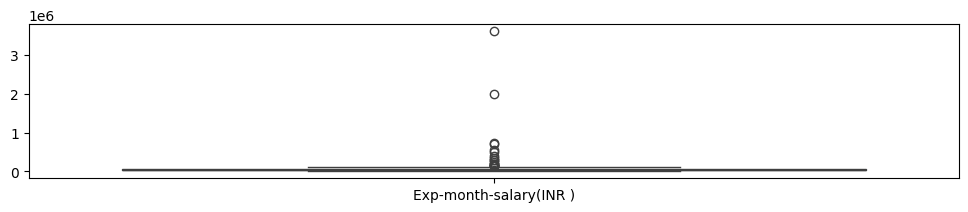

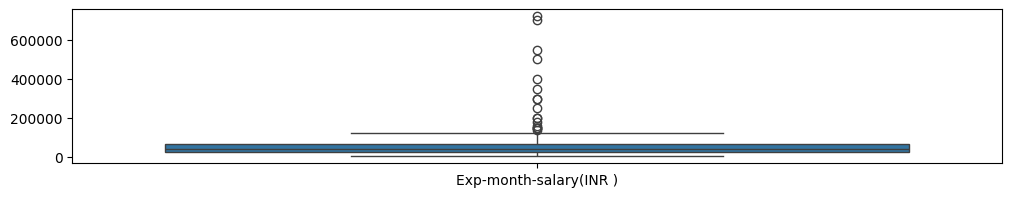

In [119]:
# Clean Expected Salary
es_median = df['Exp-month-salary(INR )'].median()
es_mean = df['Exp-month-salary(INR )'].mean()
print("Median -> ",es_median, '\t Mean -->',es_mean)

df['Exp-month-salary(INR )'] = df['Exp-month-salary(INR )'].replace({0: es_median})
print(np.sort(df['Exp-month-salary(INR )'].unique())[::-1])

# manully fixing the salary
df['Exp-month-salary(INR )'] = df['Exp-month-salary(INR )'].replace({35: 35000})

# Boxplot
sns.boxplot(data=df[['Exp-month-salary(INR )']]).figure.set_size_inches(12, 2)
plt.show()

# there are 2 Outliers in the dataset, replace them with mean
df['Exp-month-salary(INR )'] = df['Exp-month-salary(INR )'].replace({3600000: es_mean})
df['Exp-month-salary(INR )'] = df['Exp-month-salary(INR )'].replace({2000000: es_mean})

# Boxplot
sns.boxplot(data=df[['Exp-month-salary(INR )']]).figure.set_size_inches(12, 2)
plt.show()

### String Values

In [120]:
# Location
df['Location'] = df['Location'].str.replace('[,.]', '', regex=True).str.lower().str.strip()
#print(df['Location'].unique())

In [121]:
# Cleaning Domain
from clean_utils import clean_domain_column
df['Domain'] = clean_domain_column(df['Domain'])
#print(df['domain'].unique())

In [122]:
# Preferred Job
from clean_utils import clean_job_titles
#df['Preferred-job'] = clean_job_titles(df['Preferred-job'])
#print(df['Preferred-job'].unique())

# EDA
### Numerical Value Analysis

In [123]:
print(df[numerical_cols].describe())

       Exp-month-salary(INR )       Score
count              201.000000  201.000000
mean             68147.488181    7.842836
std              96577.566698    1.304172
min               5000.000000    3.510000
25%              25000.000000    7.000000
50%              40000.000000    8.000000
75%              70000.000000    8.900000
max             720000.000000   10.000000


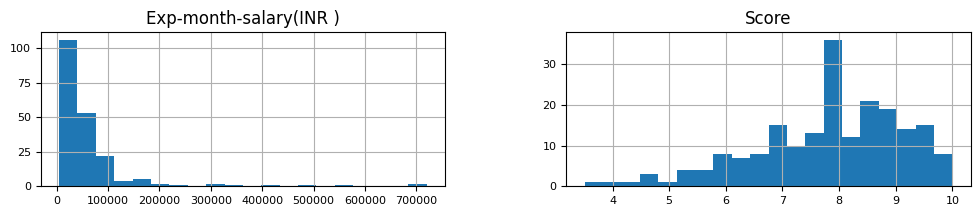

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms
df[numerical_cols].hist(figsize=(12, 2), bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

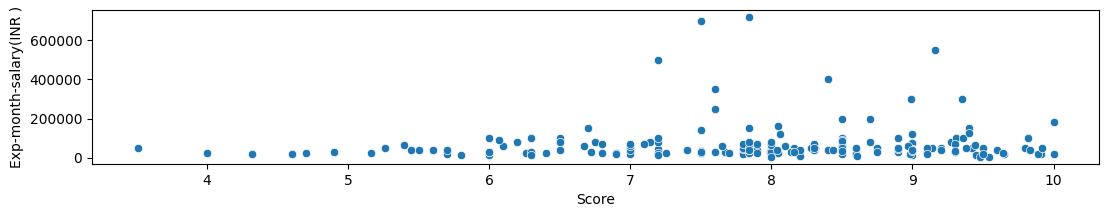

In [125]:
# Scatter plot
sns.scatterplot(x=df['Score'] , y=df['Exp-month-salary(INR )']).figure.set_size_inches(13, 2)
plt.show()

-  major Salary values are consolidated in the range of 0-50000
- students scores are average, with a mean of 78%
- there is an increase in Salary Expectation, as the Score increases, but students scoring Average(70% - 85%) Tend to Expect Higher Salary compared to student Scoring Very High
    1. it could be due to Certifications and Internships

### Score Vs (Internship | Certification)

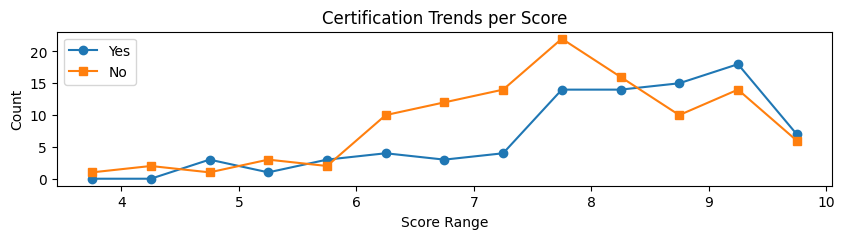

In [126]:
# Define bins and categorize scores
bin_edges = np.arange(3.5, 10.5, 0.5)
df['Score_bin'] = pd.cut(df['Score'], bins=bin_edges, right=False, include_lowest=True)

# Count "Yes" and "No" for each bin
df_counts = df.groupby(['Score_bin', 'Certification'], observed=False).size().unstack(fill_value=0)
x_numeric = [interval.mid for interval in df_counts.index]

# Plot
plt.figure(figsize=(10, 2))
plt.plot(x_numeric, df_counts.get('Yes', 0), marker='o', linestyle='-', label='Yes', color='#1f77b4')
plt.plot(x_numeric, df_counts.get('No', 0), marker='s', linestyle='-', label='No', color='#ff7f0e')

plt.xlabel("Score Range")
plt.ylabel("Count")
plt.title("Certification Trends per Score")
plt.legend()
plt.show()

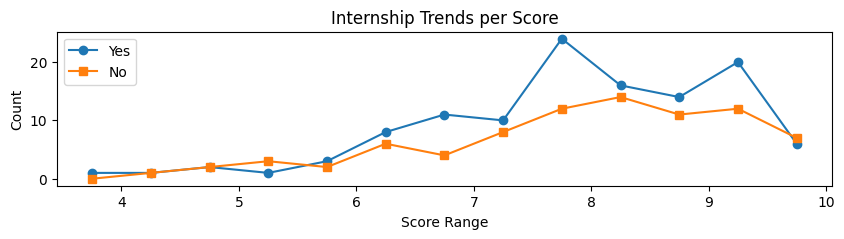

In [127]:
# Count "Yes" and "No" for each bin
df_counts = df.groupby(['Score_bin', 'Internship'], observed=False).size().unstack(fill_value=0)
x_numeric = [interval.mid for interval in df_counts.index]  # Fix the `bins.mid` issue

# Plot
plt.figure(figsize=(10, 2))
plt.plot(x_numeric, df_counts.get('yes', 0), marker='o', linestyle='-', label='Yes', color='#1f77b4')
plt.plot(x_numeric, df_counts.get('No', 0), marker='s', linestyle='-', label='No', color='#ff7f0e')

plt.xlabel("Score Range")
plt.ylabel("Count")
plt.title("Internship Trends per Score")
plt.legend()
plt.show()

- The data no Certifications contradicts the demand of Avenge(70-80) scoring student to Expect Higher salary.
**but**
- The Internships play a Positive role in student expecting higher Salary
- Student With Internships tend to expect Higher salary

## Heat-map

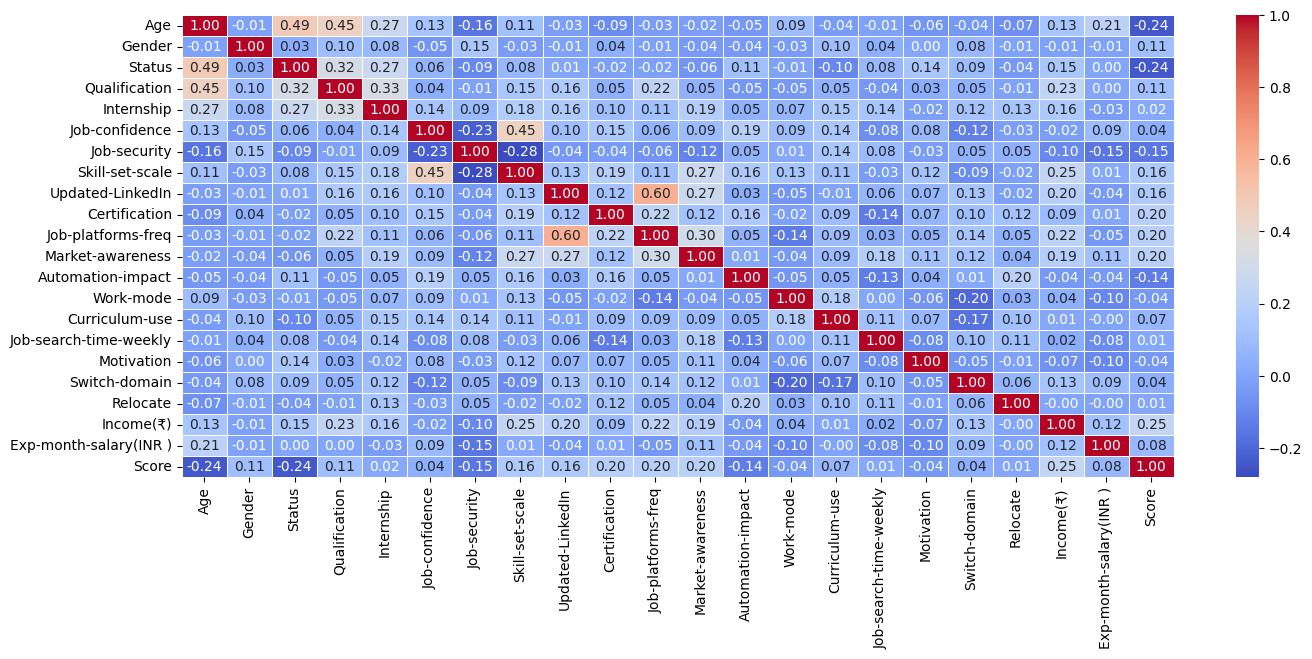

In [128]:
# Heat-map
from clean_utils import EncodeCategoricalFeatures
encoded_df = EncodeCategoricalFeatures(df)
corr_matrix = encoded_df[ categorical_cols + numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(16,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


In [129]:
# feature selection based on CHi-Square test
from clean_utils import chi_square_high_correlation
high_corr_list = chi_square_high_correlation(encoded_df, categorical_cols + numerical_cols, top_n=7)
for i in high_corr_list:
    print(i[0], '&', i[1])

Updated-LinkedIn & Job-platforms-freq
Age & Status
Age & Qualification
Job-confidence & Skill-set-scale
Age & Internship
Status & Qualification
Qualification & Internship


## Key Observations
**Positive corelation**
- Updated-LinkedIn & Job-platforms-freq
- Age & Status
- Age & Qualification

**Negative Corelation**
- Job-confidence & Job-security
- Age & Score
- Age & Job-security
- Switch-domain & Income

### Analysis

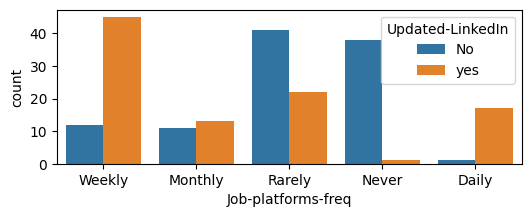

In [130]:
# Updated-LinkedIn & Job-platforms-frequency 

plt.figure(figsize=(6, 3))
sns.countplot(x=df['Job-platforms-freq'], hue=df['Updated-LinkedIn']).figure.set_size_inches(6, 2)
#plt.xticks(rotation=90)
plt.show()

- people who have updated their LinkedIn profile are more likely to use job platforms frequently, vise-versa could also be true, people visiting Job platforms frequently tend to update there LinkedIn more.

Qualification
Bachelor's degree    111
Master's degree       41
High school           37
Diploma                9
Ph. D.                 3
Name: count, dtype: int64


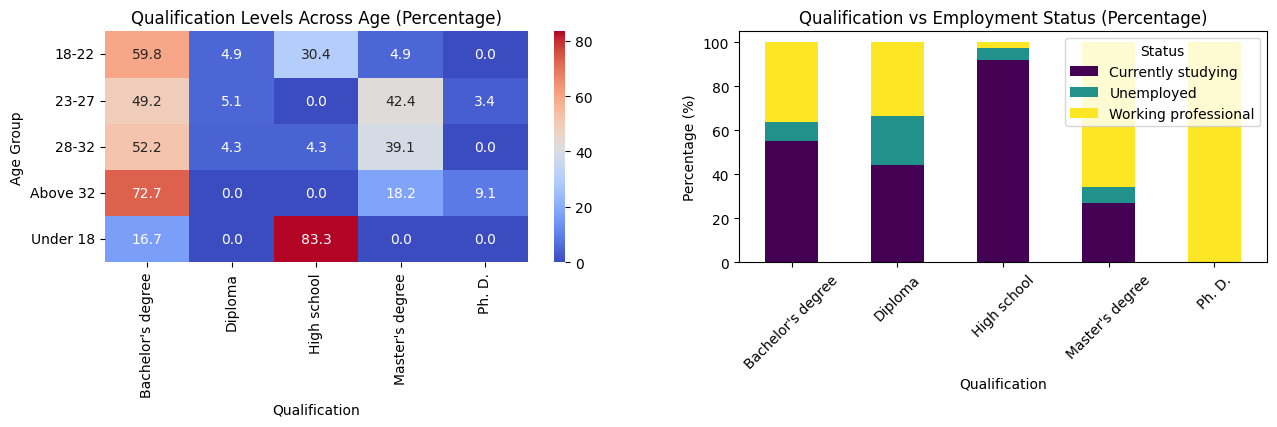

In [131]:
print(df['Qualification'].value_counts())

# Qualification and Employment Status Percentage
qualification_status = pd.crosstab(df['Qualification'], df['Status'], normalize='index') * 100

# Qualification Distribution by Age Groups (using existing bins)
age_qualification = pd.crosstab(df['Age'], df['Qualification'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(15, 3))

# Qualification vs Employment Status (Stacked Bar Chart - Percentage)
qualification_status.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[1])
axes[1].set_title("Qualification vs Employment Status (Percentage)")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_xlabel("Qualification")
axes[1].tick_params(axis='x', rotation=45)

# Heatmap of Qualification Levels Across Age (Percentage)
sns.heatmap(age_qualification, annot=True, cmap="coolwarm", fmt=".1f", ax=axes[0])
axes[0].set_title("Qualification Levels Across Age (Percentage)")
axes[0].set_xlabel("Qualification")
axes[0].set_ylabel("Age Group")

plt.show()

- Bachelor's degree is the most common qualification, after which most people Seek some kind of employment, even if they are pursuing further studies
- Students at age group(23-27) View Earning More Import that Further studies. 
    1. this could be due to annual family income.
- Observations above 32 are mostly Bachelor's, Supporting our hypothesis
- A significant portion of master's degree holders from middle-income groups are working professionals, indicating that financial independence might enable them to pursue further education.

# Classification

In [132]:
features =  ["Job-security", "Skill-set-scale"]
target = "Job-confidence"

X = encoded_df[features].astype(int)
y = encoded_df[target].astype(int)

print(y.value_counts())


Job-confidence
3    77
2    56
4    48
1    17
0     3
Name: count, dtype: int64


In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train RandomForest on the resampled dataset
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5365853658536586
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.33      0.40         3
           2       0.44      0.73      0.55        11
           3       0.56      0.56      0.56        16
           4       0.80      0.40      0.53        10

    accuracy                           0.54        41
   macro avg       0.46      0.40      0.41        41
weighted avg       0.57      0.54      0.53        41



/home/dk/code_base/ml_files/ml_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dk/code_base/ml_files/ml_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dk/code_base/ml_files/ml_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

## Feature Extraction

In [134]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
encoded_df[numerical_cols + categorical_cols] = scaler.fit_transform(encoded_df[numerical_cols + categorical_cols])

In [135]:
from clean_utils import chi_square_high_correlation

result = chi_square_high_correlation(encoded_df, categorical_cols + numerical_cols, top_n=5)

# Extract unique features from the result
features = []
for i in result:
    if i[0] not in features:
        features.append(i[0])
        
    if i[1] not in features:
        features.append(i[1])

# Manually add Score and job-expectation
if 'Score' not in features:
    features.append('Score')

In [136]:
# dimensionality reduction using PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

no_of_components = len(features)

pca = PCA(n_components=no_of_components)
pca.fit(encoded_df[features])


PCA(n_components=9)

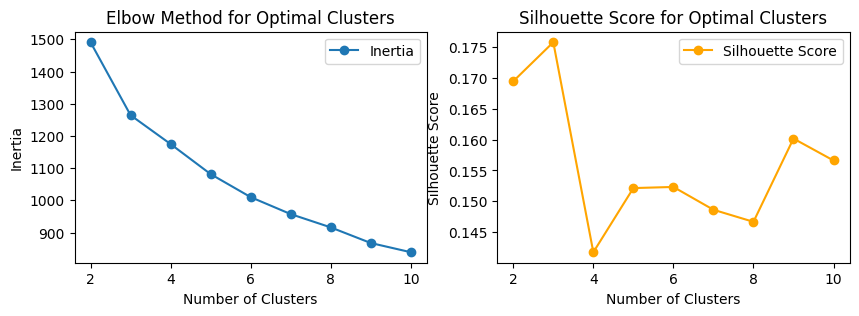

In [137]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca.transform(encoded_df[features]))
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca.transform(encoded_df[features]), kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot elbow curve
axes[0].plot(range(2, 11), inertia, marker='o', label='Inertia')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal Clusters')
axes[0].legend()

# Plot silhouette scores
axes[1].plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score', color='orange')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for Optimal Clusters')
axes[1].legend()

plt.show()

- the Elbow method dose'nt show any noticeable change, so we go with Silhouette score, which peaked at 3 clusters, So the optimal number of cluster is 3

# Clustering

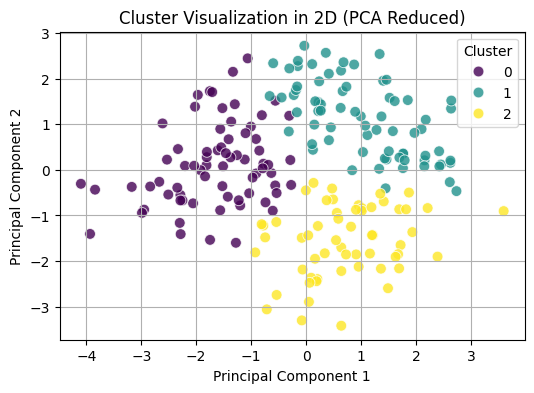

In [138]:
# Perform KMeans clustering with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca.transform(encoded_df[features]))

# Add cluster labels to the dataset for analysis
encoded_df['Cluster'] = cluster_labels

# Visualize the clusters in 2D using PCA
pca_2d = PCA(n_components=2)
pca_2d_transformed = pca_2d.fit_transform(pca.transform(encoded_df[features]))

# Create a DataFrame for 2D plotting
plot_df = pd.DataFrame(pca_2d_transformed, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = cluster_labels

plt.figure(figsize=(6, 4))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=60, alpha=0.8)
plt.title('Cluster Visualization in 2D (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

In [139]:
# Optional: Analyze clusters by computing cluster-specific summaries
cluster_summary = encoded_df.groupby('Cluster')[features].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         Updated-LinkedIn  Job-platforms-freq       Age    Status  \
Cluster                                                             
0               -0.440049           -0.403227 -0.730880 -0.700564   
1                0.888164            0.851514 -0.058811  0.016449   
2               -0.589342           -0.588270  0.985714  0.851567   

         Qualification  Job-confidence  Skill-set-scale  Internship     Score  
Cluster                                                                        
0            -0.731757       -0.234007        -0.365091   -0.832102 -0.048084  
1             0.450228        0.235246         0.379869    0.495623  0.489673  
2             0.334880       -0.009798        -0.031736    0.401733 -0.567231  


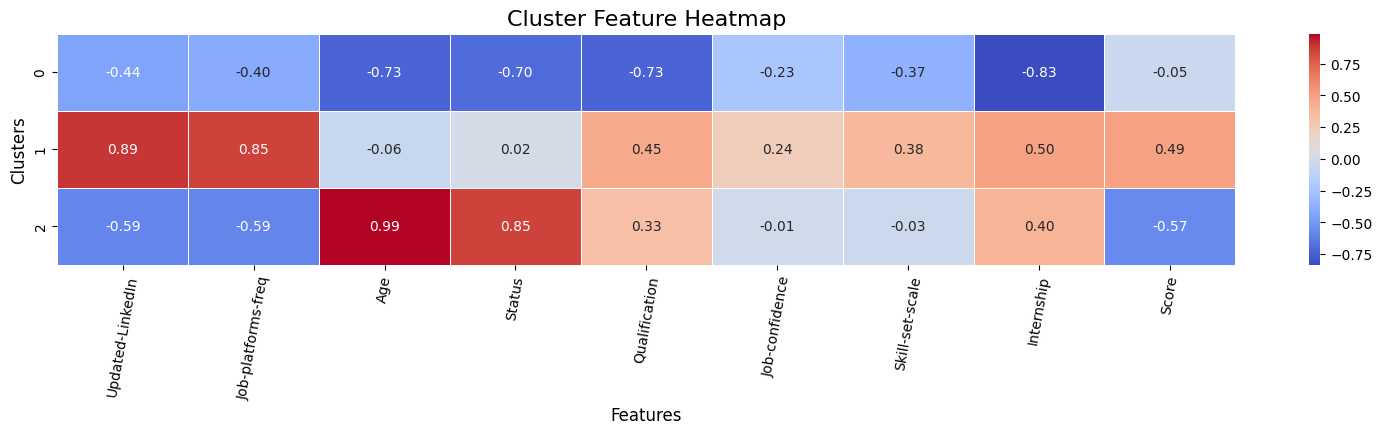

In [140]:
# Ensure cluster_summary contains only numeric data
cluster_summary_numeric = cluster_summary.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(19, 3))
sns.heatmap(cluster_summary_numeric, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Cluster Feature Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.xticks(rotation=80, fontsize=10)
plt.show()

### Key Insights

| Key Characteristics                 | **Cluster 0 (Low Engagement, Low Qualification)** | **Cluster 1 (Job Seekers, Growing Confidence)** | **Cluster 2 (Experienced, Strong Online Presence)** |
|--------------------------------------|-------------------------------------------------|-----------------------------------------------|--------------------------------------------------|
| **Stage**                            | Early-stage students (high school/first-year)   | Actively job-seeking students                | Final-year students or recent graduates         |
| **Age**                              | -0.70 (Younger students)                        | 0.99 (Older, actively job-seeking)           | -0.45 (More experienced individuals)            |
| **Status**                           | -0.62 (Least active in job market)              | 0.86 (More engaged in job search)            | -0.38 (Final-year students or transitioning)    |
| **LinkedIn Activity**                | -0.70 (Minimal engagement)                      | -0.16 (Moderate engagement)                  | 0.93 (Highly active)                            |
| **Job Platform Frequency**           | -0.54 (Not using job platforms)                 | -0.17 (Moderately active)                    | 0.77 (Strong engagement)                        |
| **Job Confidence**                   | -0.33 (Low confidence)                          | 0.11 (Improving confidence)                  | 0.21 (Moderate confidence)                      |
| **Internship Experience**            | -0.74 (Least experienced)                       | 0.47 (Some exposure)                         | 0.21 (Real-world job experience)               |
| **Qualification**                    | -0.74 (Weaker academic/professional skills)     | 0.51 (Moderate qualifications)               | 0.16 (Decent qualification, mostly Bachelor's) |
| **Score (Academic Performance)**     | -0.12 (Low performance)                         | -0.48 (Needs improvement)                    | 0.70 (Academically strong)                      |



In [141]:
from clean_utils import clean_transactions
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Split industry preferences into lists
new_df = df["Preferred-industry"].str.split(", ").fillna("None")

# Convert data into a list of transactions
transactions = clean_transactions(new_df.to_list())

# Encode transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
new_df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori Algorithm
frequent_itemset = apriori(new_df_encoded, min_support=0.003, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

# Sorting Rules by Support
rules = rules.sort_values(by=['support'], ascending=False)
print("RULES 1:\n", rules)

# Adding Antecedent and Consequent Length
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
print("RULES 2:\n", rules)

# Filtering Rules with at Least Two Antecedents
filtered_rules = rules[rules['antecedent_len'] >= 2]
print("RULES 3:\n", filtered_rules)

# Additional Filtering: Confidence > 0.3 and Lift > 1
filtered_rules = rules[(rules['antecedent_len'] >= 2) &
                       (rules['confidence'] > 0.3) &
                       (rules['lift'] > 1)].sort_values(by=['lift', 'support'], ascending=False)
print("RULES 4:\n", filtered_rules)

# Filtering by Consequent Length
filtered_rules = rules[(rules['consequent_len'] >= 2) &
                       (rules['lift'] > 1)].sort_values(by=['lift', 'confidence'], ascending=False)
print("RULES 5:\n", filtered_rules)

# Recalculate Lift (though unnecessary, as mlxtend already provides it)
rules['calculated_lift'] = rules['support'] / (rules['antecedent_len'] * rules['consequent_len'])
print(rules)


RULES 1:
                          antecedents           consequents  \
42                              (it)             (finance)   
43                         (finance)                  (it)   
26                       (education)          (healthcare)   
27                      (healthcare)           (education)   
46                         (finance)           (marketing)   
..                               ...                   ...   
131  (food and beverages, education)     (pharmaceuticals)   
132     (pharmaceuticals, education)  (food and beverages)   
2                       (accounting)           (education)   
1                          (finance)          (accountant)   
0                       (accountant)             (finance)   

     antecedent support  consequent support   support  confidence        lift  \
42             0.338308            0.268657  0.139303    0.411765    1.532680   
43             0.268657            0.338308  0.139303    0.518519    1.532680   
26

In [142]:
def inspect(rules_df):
    return rules_df[['antecedents', 'consequents','lift']]

# Convert the rules DataFrame to a more readable format
resultsinDataFrame = inspect(rules)

# Display the top 10 rules sorted by lift
top_rules = resultsinDataFrame.nlargest(n=10, columns='lift')
print(top_rules)

                       antecedents                    consequents   lift
85   (pharmaceuticals, healthcare)                (biotechnology)  201.0
88                 (biotechnology)  (pharmaceuticals, healthcare)  201.0
133           (food and beverages)   (pharmaceuticals, education)  201.0
132   (pharmaceuticals, education)           (food and beverages)  201.0
12               (pharmaceuticals)                (biotechnology)  100.5
13                 (biotechnology)              (pharmaceuticals)  100.5
48            (food and beverages)              (pharmaceuticals)  100.5
49               (pharmaceuticals)           (food and beverages)  100.5
86     (biotechnology, healthcare)              (pharmaceuticals)  100.5
87               (pharmaceuticals)    (biotechnology, healthcare)  100.5


### Strong Connections
- IT & Finance have a strong bidirectional relationship, with IT, Finance & Marketing have a strong combined association
- Finance & Marketing are also well connected
- Education & Healthcare have a strong mutual link, (pharmaceuticals, healthcare) -> (biotechnology)

### Niche Relationships
- (Food & Beverages, Pharmaceuticals) → (Education)

### Conclusions
- IT professionals often transition into finance and marketing roles.
- Education and healthcare sectors are interconnected, suggesting career movement between them.
- Accountants are highly likely to be in finance, making it a clear career path
- Companies in food & beverages should explore pharmaceutical and educational collaborations
